In [2]:
#librerias para el desarrollo del proyecto
import matplotlib.pyplot as plt #libreria para graficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

#librerias pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

#enlazando los datos en el archivo excel
data = pd.read_csv("AnemiaTipos.csv",index_col=None)
import numpy as np
#invocando a la libreria de clasificacion
from sklearn.ensemble import RandomForestClassifier

In [3]:
data

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [4]:
data.shape

(1150, 15)

In [5]:
data.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1150 non-null   float64
 1   LYMp       1150 non-null   float64
 2   NEUTp      1150 non-null   float64
 3   LYMn       1150 non-null   float64
 4   NEUTn      1150 non-null   float64
 5   RBC        1150 non-null   float64
 6   HGB        1150 non-null   float64
 7   HCT        1150 non-null   float64
 8   MCV        1150 non-null   float64
 9   MCH        1150 non-null   float64
 10  MCHC       1150 non-null   float64
 11  PLT        1150 non-null   float64
 12  PDW        1150 non-null   float64
 13  PCT        1150 non-null   float64
 14  Diagnosis  1150 non-null   object 
dtypes: float64(14), object(1)
memory usage: 134.9+ KB


In [12]:
null_columns=data.columns[data.isnull().any()]

print(null_columns)

Index([], dtype='object')


<Axes: >

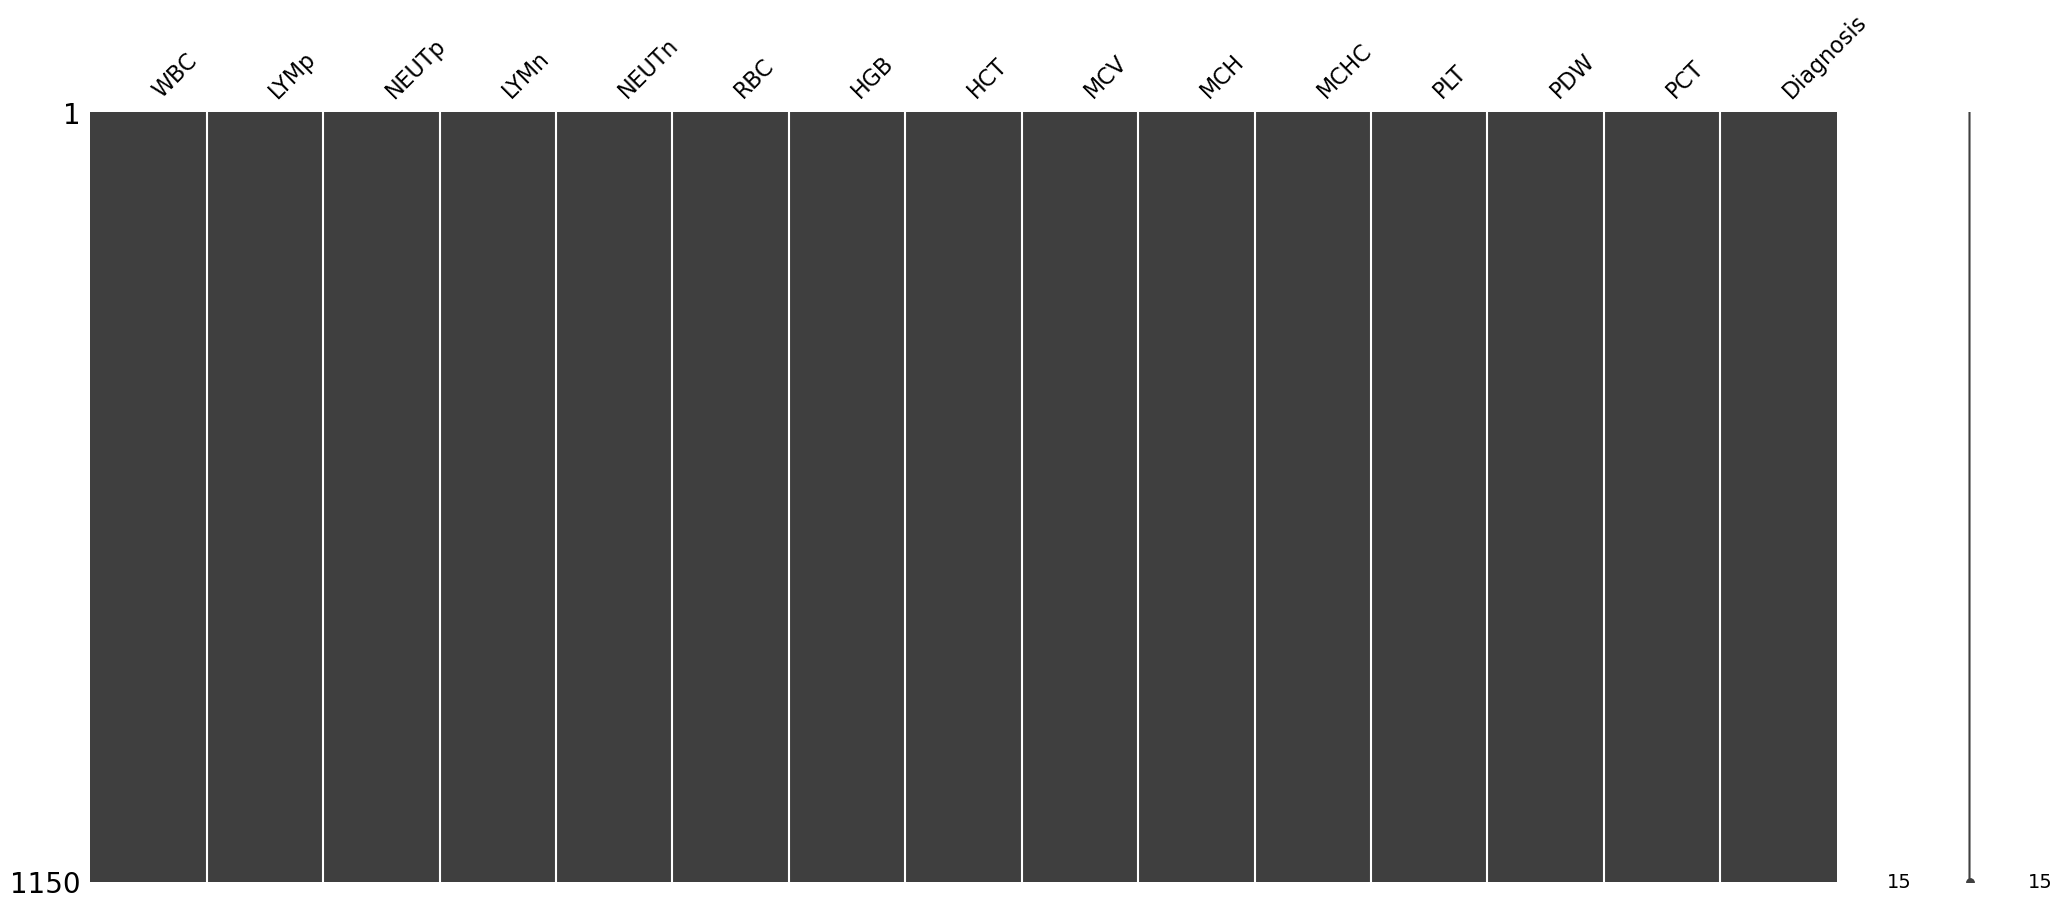

In [13]:
import missingno as msno
msno.matrix(data) 
# gráfico tipo "matriz de calor" 
#saldra en gris porque no hay datos faltantes

In [14]:
# captura el numero de filas y columnas
rows = len(data.axes[0])
cols = len(data.axes[1])

# Imprimir el numero de filas y columnas
print("Numero de filas: " + str(rows))
print("Numero de columnas: " + str(cols))

Numero de filas: 1150
Numero de columnas: 15


In [16]:
data.isnull().any()
# Devuelve una Serie booleana donde cada columna indica si tiene algún NaN.

WBC          False
LYMp         False
NEUTp        False
LYMn         False
NEUTn        False
RBC          False
HGB          False
HCT          False
MCV          False
MCH          False
MCHC         False
PLT          False
PDW          False
PCT          False
Diagnosis    False
dtype: bool

In [18]:
#Verificamos cuantos tipos de "ANEMIA" hay :V
print(data.groupby('Diagnosis').size())

Diagnosis
Healthy                           336
Iron deficiency anemia            189
Macrocytic anemia                  18
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Other microcytic anemia            59
dtype: int64


In [20]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


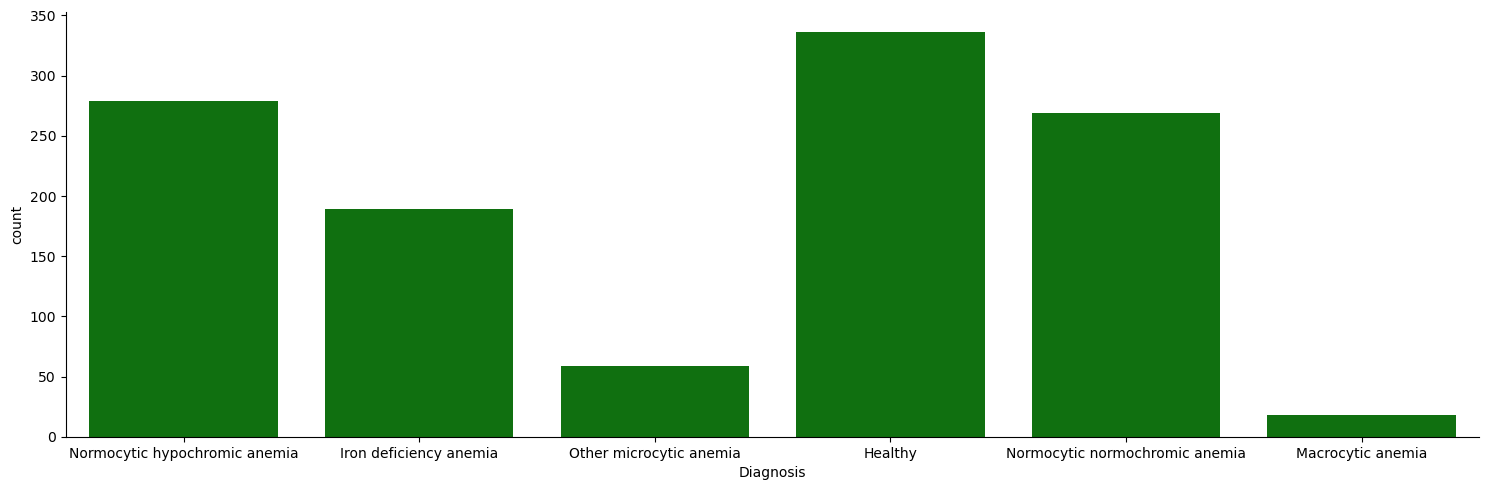

In [18]:
import seaborn as sb

sb.catplot(x='Diagnosis', data=data, kind='count', aspect=3, color='green')


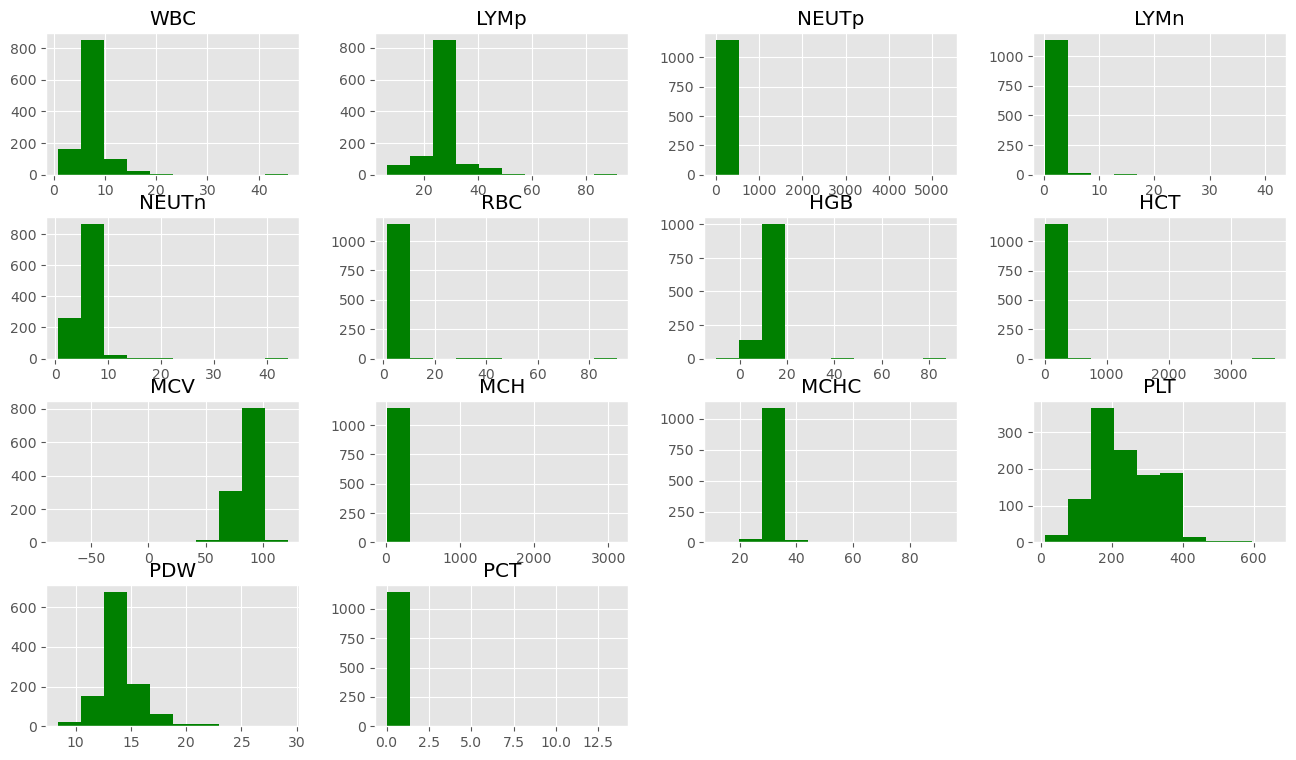

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data.hist(color='green')
plt.show()

In [21]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [24]:
X.shape

(1150, 14)

In [26]:
Y = data['Diagnosis']
#ya = data_datos["dxd"] 
Y.shape

(1150,)

## CODIFICANDO "Y" 

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [31]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## PARTICIONAMIENTO DE LA DATA

In [36]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")


---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


## BALANCEADO

In [39]:
from imblearn.combine import SMOTEENN
from collections import Counter

print("Distribución antes del resampling:", Counter(y_trainset))

os_us = SMOTEENN(sampling_strategy='auto', random_state=0)
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

print("Distribución tras aplicar SMOTE-ENN:", Counter(y_train_res))

Distribución antes del resampling: Counter({0: 272, 3: 225, 4: 208, 1: 151, 5: 49, 2: 15})
Distribución tras aplicar SMOTE-ENN: Counter({2: 259, 5: 229, 4: 198, 0: 195, 1: 184, 3: 109})


## CORRELACIÓN DE LAS VARIBALES

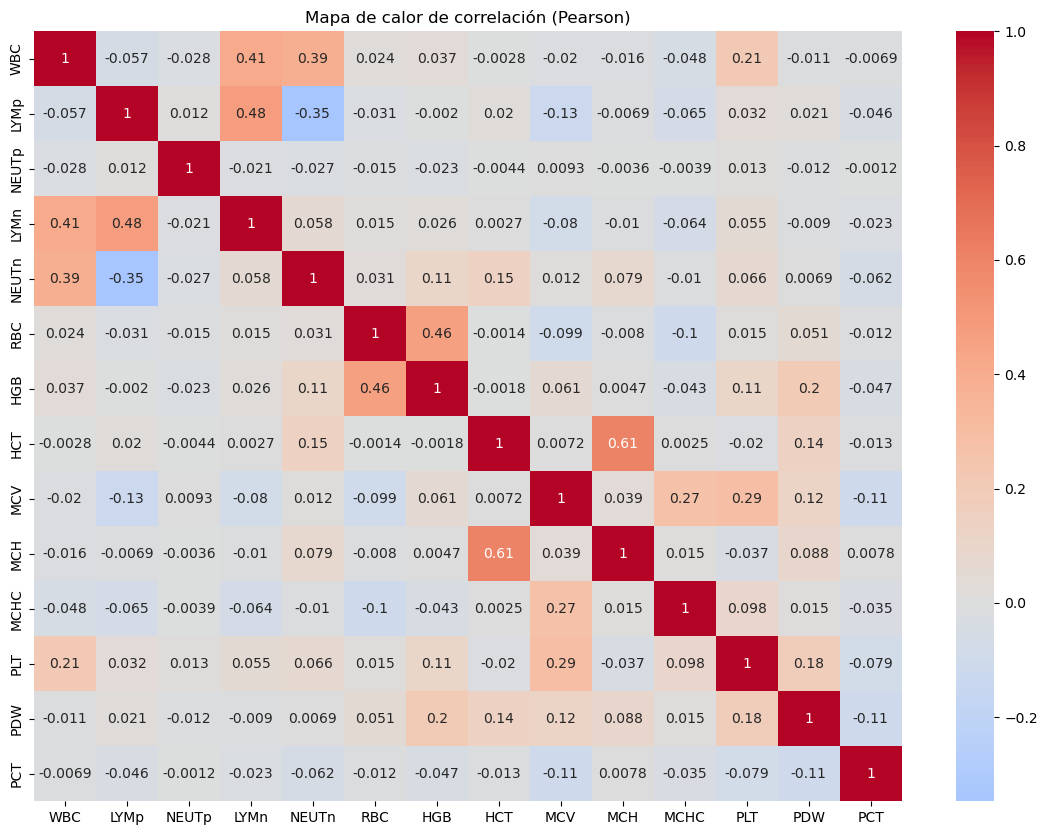

In [42]:
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])
corr_df = numeric_data.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_df, annot=True, cbar=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlación (Pearson)")
plt.show()

## MODELO RANDOM FOREST

In [45]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, None],
    'max_leaf_nodes': [3, 6, None],
    'criterion': ['gini', 'entropy']
}
  
grid = GridSearchCV(RandomForestClassifier(), 
                    param_grid, 
                    refit = True, 
                    verbose = 3, 
                    cv = 5)
  
# fitting the model for grid search
grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.872 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.859 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.881 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.881 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, None],
                         'n_estimators': [25, 50, 100]},
             verbose=3)

In [47]:
print("Mejores parámetros encontrados:", grid.best_params_)

Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'n_estimators': 100}


In [49]:
model = grid.best_estimator_  # Asigna el mejor modelo encontrado por GridSearchCV a la variable 'model'
model  # Muestra el modelo para ver sus parámetros y configuración

RandomForestClassifier(max_depth=6)

In [51]:
model.classes_

array([0, 1, 2, 3, 4, 5])

In [53]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluación con datos SIN balancear
scores_unbalanced = cross_val_score(grid.best_estimator_, X_trainset, y_trainset, cv=k_folds)
print("Scores con datos SIN balancear:", scores_unbalanced)
print("Media accuracy SIN balancear:", scores_unbalanced.mean())

# Ajustar el mejor modelo con datos SIN balancear para usar después si quieres ni caso xd
grid.best_estimator_.fit(X_trainset, y_trainset)

# Evaluación con datos BALANCEADOS
scores_balanced = cross_val_score(grid.best_estimator_, X_train_res, y_train_res, cv=k_folds)
print("Scores con datos BALANCEADOS:", scores_balanced)
print("Media accuracy BALANCEADOS:", scores_balanced.mean())

# Ajustar el mejor modelo con datos BALANCEADOS para usar después si quieres
grid.best_estimator_.fit(X_train_res, y_train_res)
##Cada número es la accuracy que obtuvo el modelo en una de las 10 particiones (folds) del KFold con los datos originales, sin aplicar balanceo.

Scores con datos SIN balancear: [0.98913043 0.97826087 1.         0.9673913  0.98913043 0.93478261
 0.97826087 0.97826087 0.9673913  0.97826087]
Media accuracy SIN balancear: 0.976086956521739
Scores con datos BALANCEADOS: [1.         1.         1.         1.         0.99145299 1.
 0.98290598 1.         1.         1.        ]
Media accuracy BALANCEADOS: 0.9974358974358974


RandomForestClassifier(max_depth=6)

## MÉTRICAS DEL MODELO (TRAIN)

In [55]:
pred = grid.best_estimator_.predict(X_train_res)


In [59]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer

probs = grid.predict_proba(X_train_res)

# MÉTRICAS DEL MODELO (TRAIN)
pred = grid.best_estimator_.predict(X_train_res)

print('El accuracy en el conjunto de entrenamiento es:', accuracy_score(y_train_res, pred), '→', accuracy_score(y_train_res, pred)*100, '%')
print('La precisión en el conjunto de entrenamiento es:', precision_score(y_train_res, pred, average='macro'), '→', precision_score(y_train_res, pred, average='macro')*100, '%')
print('La sensibilidad en el conjunto de entrenamiento es:', recall_score(y_train_res, pred, average='macro'), '→', recall_score(y_train_res, pred, average='macro')*100, '%')
print('El F1-score en el conjunto de entrenamiento es:', f1_score(y_train_res, pred, average='macro'), '→', f1_score(y_train_res, pred, average='macro')*100, '%')

roc_auc = roc_auc_score(y_train_res, probs[:, 1]) if len(grid.best_estimator_.classes_) == 2 else roc_auc_score(LabelBinarizer().fit_transform(y_train_res), probs, multi_class='ovr')
print('El ROC AUC en el conjunto de entrenamiento es:', roc_auc, '→', roc_auc*100, '%')

print('Matthews Correlation Coefficient es:', matthews_corrcoef(y_train_res, pred))

El accuracy en el conjunto de entrenamiento es: 1.0 → 100.0 %
La precisión en el conjunto de entrenamiento es: 1.0 → 100.0 %
La sensibilidad en el conjunto de entrenamiento es: 1.0 → 100.0 %
El F1-score en el conjunto de entrenamiento es: 1.0 → 100.0 %
El ROC AUC en el conjunto de entrenamiento es: 1.0 → 100.0 %
Matthews Correlation Coefficient es: 1.0


In [61]:
# Solo para mostrar el classification_report con clases decodificadas
y_true_labels = le.inverse_transform(y_train_res)
y_pred_labels = le.inverse_transform(pred)

print(classification_report(y_true_labels, y_pred_labels))


                                precision    recall  f1-score   support

                       Healthy       1.00      1.00      1.00       195
        Iron deficiency anemia       1.00      1.00      1.00       184
             Macrocytic anemia       1.00      1.00      1.00       259
 Normocytic hypochromic anemia       1.00      1.00      1.00       109
Normocytic normochromic anemia       1.00      1.00      1.00       198
       Other microcytic anemia       1.00      1.00      1.00       229

                      accuracy                           1.00      1174
                     macro avg       1.00      1.00      1.00      1174
                  weighted avg       1.00      1.00      1.00      1174



In [63]:
pred = grid.predict(X_trainset)
print(classification_report(le.inverse_transform(y_trainset), le.inverse_transform(pred)))
##decodificado temporalmente xd

                                precision    recall  f1-score   support

                       Healthy       1.00      0.99      0.99       272
        Iron deficiency anemia       0.98      0.99      0.98       151
             Macrocytic anemia       0.75      1.00      0.86        15
 Normocytic hypochromic anemia       0.95      0.95      0.95       225
Normocytic normochromic anemia       0.99      0.94      0.97       208
       Other microcytic anemia       0.87      0.98      0.92        49

                      accuracy                           0.97       920
                     macro avg       0.92      0.97      0.95       920
                  weighted avg       0.97      0.97      0.97       920



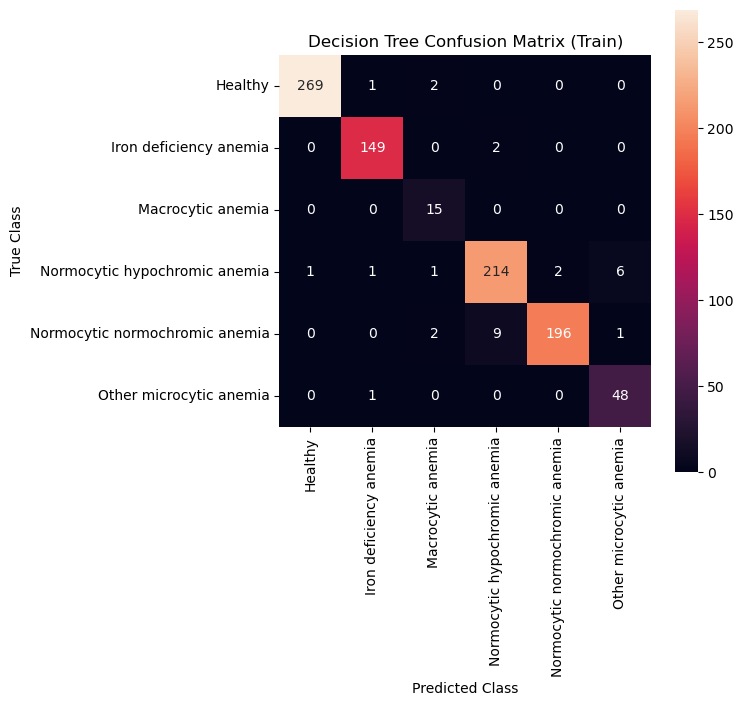

In [65]:
# Decodificamos usando tu codificador 'le'
y_true_labels = le.inverse_transform(y_trainset)
y_pred_labels = le.inverse_transform(pred)

# Creamos la matriz de confusión con nombres de clases reales
enf_matrix = pd.crosstab(y_true_labels, y_pred_labels, rownames=['ACTUAL'], colnames=['Predicción'])

# Gráfico
plt.rcParams["figure.figsize"] = (6, 6)
sns.heatmap(enf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Decision Tree Confusion Matrix (Train)')
plt.show()


## MÉTRICAS DEL MODELO (TEST)

In [68]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer

probs = grid.predict_proba(X_testset)

# MÉTRICAS DEL MODELO (TEST)
pred = grid.best_estimator_.predict(X_testset)

print('El accuracy en el conjunto de prueba es:', accuracy_score(y_testset, pred), '→', accuracy_score(y_testset, pred)*100, '%')
print('La precisión en el conjunto de prueba es:', precision_score(y_testset, pred, average='macro'), '→', precision_score(y_testset, pred, average='macro')*100, '%')
print('La sensibilidad en el conjunto de prueba es:', recall_score(y_testset, pred, average='macro'), '→', recall_score(y_testset, pred, average='macro')*100, '%')
print('El F1-score en el conjunto de prueba es:', f1_score(y_testset, pred, average='macro'), '→', f1_score(y_testset, pred, average='macro')*100, '%')

roc_auc = roc_auc_score(y_testset, probs[:, 1]) if len(grid.best_estimator_.classes_) == 2 else roc_auc_score(LabelBinarizer().fit_transform(y_testset), probs, multi_class='ovr')
print('El ROC AUC en el conjunto de prueba es:', roc_auc, '→', roc_auc*100, '%')

print('Matthews Correlation Coefficient es:', matthews_corrcoef(y_testset, pred))

El accuracy en el conjunto de prueba es: 0.9608695652173913 → 96.08695652173913 %
La precisión en el conjunto de prueba es: 0.9046962935256005 → 90.46962935256005 %
La sensibilidad en el conjunto de prueba es: 0.9473449200566687 → 94.73449200566687 %
El F1-score en el conjunto de prueba es: 0.9226516675279687 → 92.26516675279687 %
El ROC AUC en el conjunto de prueba es: 0.9928508560825345 → 99.28508560825345 %
Matthews Correlation Coefficient es: 0.9494681527904513


In [75]:
# Decodificamos etiquetas para mostrar nombres reales (temporales)
y_true_labels = le.inverse_transform(y_testset)
y_pred_labels = le.inverse_transform(pred)

from sklearn.metrics import classification_report

print(classification_report(y_true_labels, y_pred_labels))


                                precision    recall  f1-score   support

                       Healthy       0.98      0.89      0.93        64
        Iron deficiency anemia       0.93      0.97      0.95        38
             Macrocytic anemia       0.50      1.00      0.67         3
 Normocytic hypochromic anemia       1.00      0.91      0.95        54
Normocytic normochromic anemia       0.92      0.98      0.95        61
       Other microcytic anemia       0.75      0.90      0.82        10

                      accuracy                           0.93       230
                     macro avg       0.85      0.94      0.88       230
                  weighted avg       0.95      0.93      0.94       230



In [77]:
pred = grid.predict(X_testset)

# Decodificar las etiquetas codificadas a sus nombres originales solo para mostrar
y_test_labels = le.inverse_transform(y_testset)
pred_labels = le.inverse_transform(pred)

# Mostrar el reporte con etiquetas originales
print(classification_report(y_test_labels, pred_labels))


                                precision    recall  f1-score   support

                       Healthy       0.98      0.89      0.93        64
        Iron deficiency anemia       0.93      0.97      0.95        38
             Macrocytic anemia       0.50      1.00      0.67         3
 Normocytic hypochromic anemia       1.00      0.91      0.95        54
Normocytic normochromic anemia       0.92      0.98      0.95        61
       Other microcytic anemia       0.75      0.90      0.82        10

                      accuracy                           0.93       230
                     macro avg       0.85      0.94      0.88       230
                  weighted avg       0.95      0.93      0.94       230



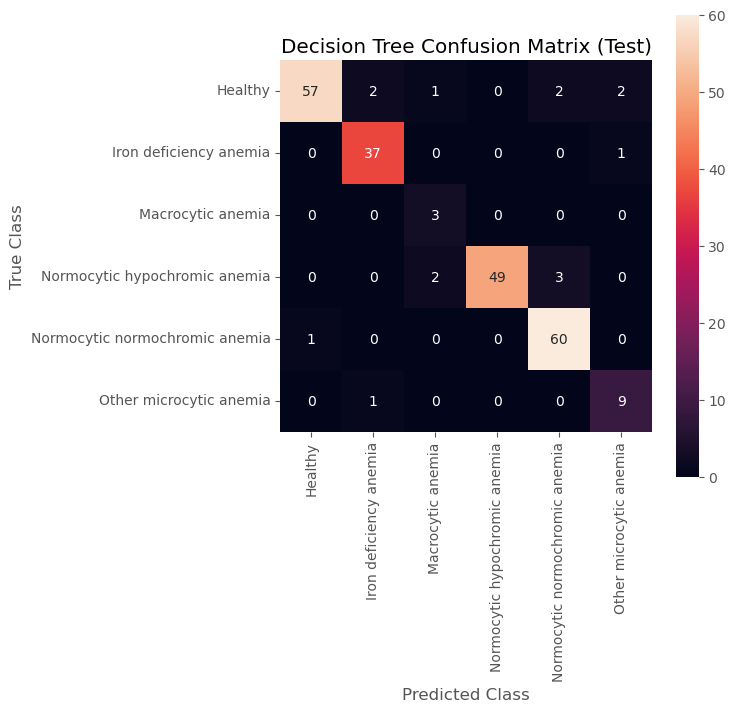

In [79]:
# Decodificar las etiquetas reales y predichas para la matriz
y_test_labels = le.inverse_transform(y_testset)
pred_labels = le.inverse_transform(pred)

# Crear matriz de confusión con etiquetas decodificadas
cnf_matrix = pd.crosstab(y_test_labels, pred_labels, rownames=['ACTUAL'], colnames=['Predicción'])

# Graficar matriz con seaborn
sb.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Decision Tree Confusion Matrix (Test)')
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()


## ROC CURVE (TRAIN)

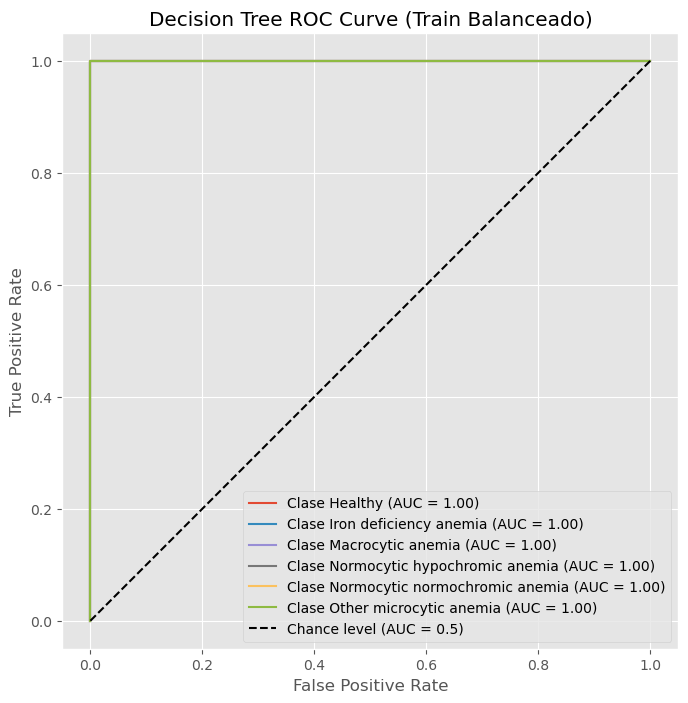

In [82]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener probabilidades para todas las clases usando datos balanceados
probs = model.predict_proba(X_train_res)

# Convertir las etiquetas balanceadas a formato binarizado (para ROC multiclasificación)
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_res)

# Crear la figura
plt.figure(figsize=(8, 8))

# Iterar sobre cada clase y graficar la curva ROC para esa clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]  # Decodifica el índice de la clase
    plt.plot(fpr, tpr, label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea de referencia para la aleatoriedad (AUC = 0.5)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

# Configuración de los ejes y etiquetas
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve (Train Balanceado)")
plt.legend(loc="lower right")
plt.show()


## ROC CURVE (TEST)

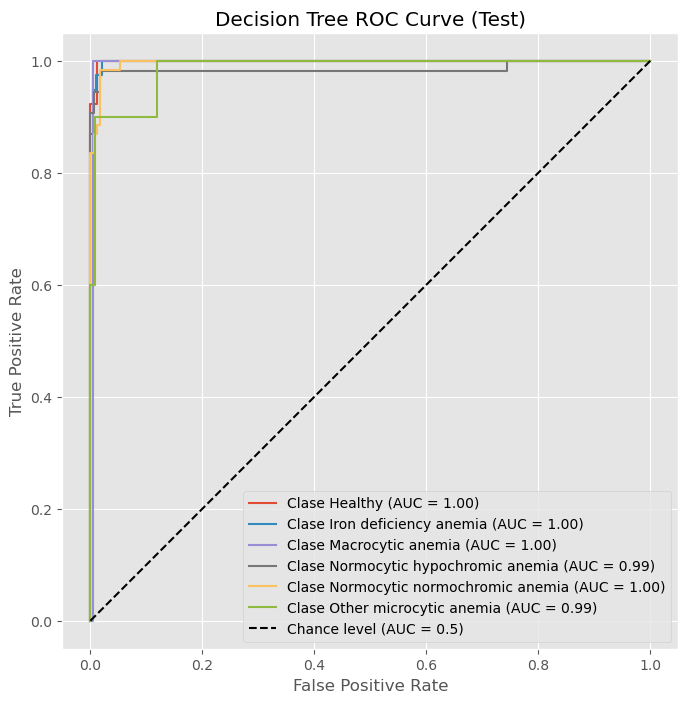

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener las probabilidades para todas las clases en el conjunto de test
probs = model.predict_proba(X_testset)

# Convertir las etiquetas de test a formato binarizado (para ROC multiclasificación)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_testset)

# Crear la figura
plt.figure(figsize=(8, 8))

# Iterar sobre cada clase y graficar la curva ROC para esa clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])  
    roc_auc = auc(fpr, tpr)
    # Usamos 'le' para decodificar el índice de la clase y mostrar su nombre real
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(fpr, tpr, label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea de referencia para la aleatoriedad (AUC = 0.5)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

# Configuración de los ejes y etiquetas
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve (Test)")
plt.legend(loc="lower right")
plt.show()


## PRECISION RECALL CURVE (TRAIN)

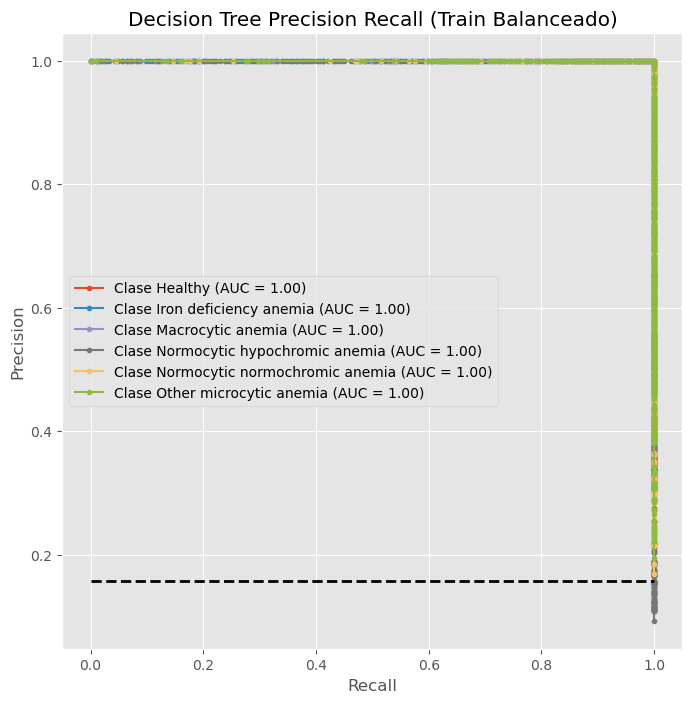

In [88]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Convertir las etiquetas balanceadas a formato binarizado
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_res)

# Obtener probabilidades para todas las clases (datos balanceados)
probs = model.predict_proba(X_train_res)

plt.figure(figsize=(8, 8))

for i in range(y_train_bin.shape[1]):
    lr_precision, lr_recall, _ = precision_recall_curve(y_train_bin[:, i], probs[:, i])
    roc_auc = auc(lr_recall, lr_precision)
    # Decodificamos la clase para mostrar nombre original
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(lr_recall, lr_precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea de referencia para la aleatoriedad según datos balanceados
no_skill = len(y_train_res[y_train_res==1]) / len(y_train_res)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision Recall (Train Balanceado)')
plt.legend(loc='best')
plt.show()


## PRECISION RECALL CURVE (TEST)

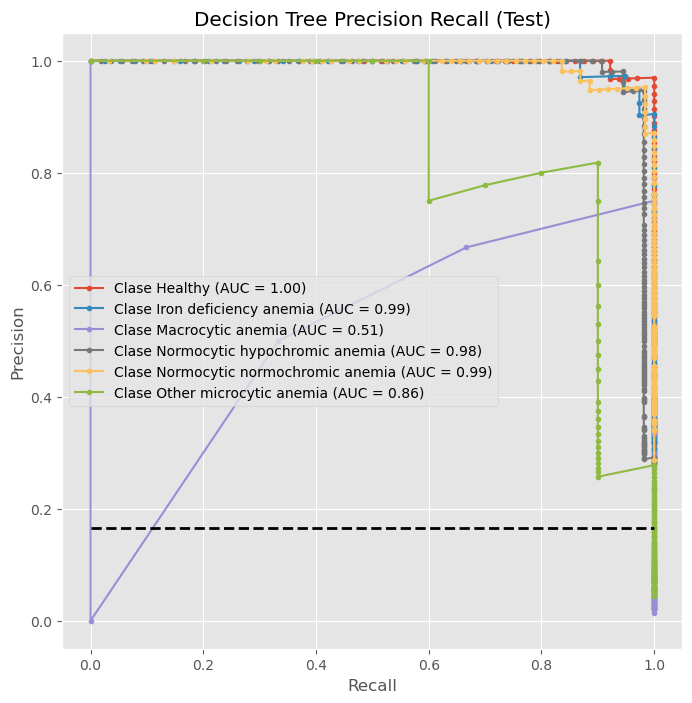

In [91]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Convertir las etiquetas a formato binarizado
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_testset)

# Obtener probabilidades para todas las clases
probs = model.predict_proba(X_testset)

# Crear la figura
plt.figure(figsize=(8, 8))

# Iterar sobre cada clase y graficar la curva Precision-Recall para esa clase
for i in range(y_test_bin.shape[1]):
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(lr_recall, lr_precision)
    # Decodificación temporal para mostrar nombres originales
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(lr_recall, lr_precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea de referencia para la aleatoriedad
no_skill = len(y_testset[y_testset==1]) / len(y_testset)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

# Etiquetas de los ejes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision Recall (Test)')

# Mostrar leyenda
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()


In [199]:
import pickle
pickle.dump(model, open('./Models/rf_hp.pkl', 'wb'))